In [2]:
import sys
sys.path.append("/home/aayushjoshi/ML/MLenv/lib/python3.11/site-packages")

In [14]:
from transformers import BertTokenizer
import tensorflow as tf
import pandas as pd

In [5]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_text(text):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,  # hyperparameter to change 
        return_token_type_ids=True,
        pad_to_max_length=True,
        return_attention_mask=True,
        truncation=True
    )

In [7]:
model_path = 'berta_v1'
model = tf.keras.models.load_model(model_path)

In [11]:
reduced_labels = ['joy', 'sadness', 'nervousness', 'anger', 'disgust', 'optimism', 'grief', 'neutral']

In [22]:
def predict_emotion(text):
    tokens = tokenize_text(text)
    input_ids = tf.convert_to_tensor([tokens['input_ids']])
    attention_mask = tf.convert_to_tensor([tokens['attention_mask']])
    token_type_ids = tf.convert_to_tensor([tokens['token_type_ids']])

    predictions = model.predict({'input_ids': input_ids,
                                 'attention_mask': attention_mask,
                                 'token_type_ids': token_type_ids})

    # predicted_class_index = tf.argmax(predictions['logits'], axis=1).numpy()[0]
    predicted_class_index = tf.nn.softmax(predictions['logits'], axis=1)
    return predicted_class_index

# Example usage
text_to_predict = "hey i am so happy to see you."
predicted_emotion_index = predict_emotion(text_to_predict)
predicted_emotion_index
# print(f"Predicted Emotion: {reduced_labels[predicted_emotion_index]}")

/home/aayushjoshi/ML/MLenv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


1/1 [==============================] - 1s 551ms/step


<tf.Tensor: shape=(1, 8), dtype=float32, numpy=
array([[0.11094441, 0.07908057, 0.02516637, 0.09742302, 0.03008828,
        0.11647383, 0.08986265, 0.45096087]], dtype=float32)>

In [15]:
test = pd.read_csv('/home/aayushjoshi/ML/Projects/emotions/dataset/dataset_test.csv')

1/1 [==============================] - 0s 362ms/step


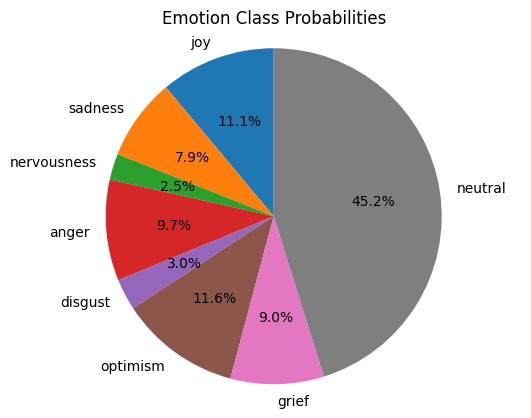

In [27]:
import matplotlib.pyplot as plt

def plot_pie_chart(class_probabilities, emotion_labels):
    class_probabilities = class_probabilities.numpy().flatten()

    fig, ax = plt.subplots()
    ax.pie(class_probabilities, labels=emotion_labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  

    plt.title("Emotion Class Probabilities")
    plt.show()

text_to_predict = "how are you??."
class_probabilities = predict_emotion(text_to_predict)

emotion_labels = ['joy', 'sadness', 'nervousness', 'anger', 'disgust', 'optimism', 'grief', 'neutral']

plot_pie_chart(class_probabilities, emotion_labels)